# Kinematic Center of Mass: tutorial

If the center_of_mass package is not installed, run the following lines:
```
import sys
sys.path.insert(0, '../src')
```

In [2]:
import center_of_mass

The example data file is loaded.

In [3]:
import pickle
input_file     = '..\\examples\\example_data.pkl'
pickle_file    = open(input_file,'rb')
data           = pickle.load(pickle_file)
pickle_file.close()
sex            = data['sex']                # 'female' or 'male'
Labels         = data['Labels']             # list of marker labels
Position       = data['Position']           # dictionary with, for each marker, the position in meters (numpy.ndarray of shape (3,duration*Position_frequency)

We collect the kinematic data into a Kinematics object, which generates additional attributes: Joint_centers, SegmentCoordinateSystem, SegmentLength and SegmentOrigin.

In [4]:
kinematics    = center_of_mass.Kinematics(Position, Labels, sex)

Function for visualising segments

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget
instant = 500 # timepoint at which the data will be visualised

def visualise(kinematics, segments = [], xlim = [1,2.8], ylim = [-0.9,0.9], zlim = [0,1.8], instant = instant):
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection="3d")
    for marker in kinematics.Labels:
        position = kinematics.Position[marker][:,instant]
        ax.scatter(position[0],position[1],position[2], color = 'k', s=0.5)
    for segment in segments:
        origin   = kinematics.SegmentOrigin[segment][:,instant]
        if segment == 'Head':
            endpoint = origin + kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][1][:,instant]
        elif segment.endswith('Foot'):
            endpoint = origin + kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][0][:,instant]  
        else:
            endpoint = origin - kinematics.SegmentLength[segment]*kinematics.SegmentCoordinateSystem[segment][1][:,instant] 
        ax.scatter(origin[0],origin[1],origin[2], label = segment)
        ax.plot([origin[0],endpoint[0]],[origin[1],endpoint[1]],[origin[2],endpoint[2]]) 
    ax.legend()    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    return ax

The length, coordinate system and origin of each segment can be calculated using the methods of the Kinematics class.

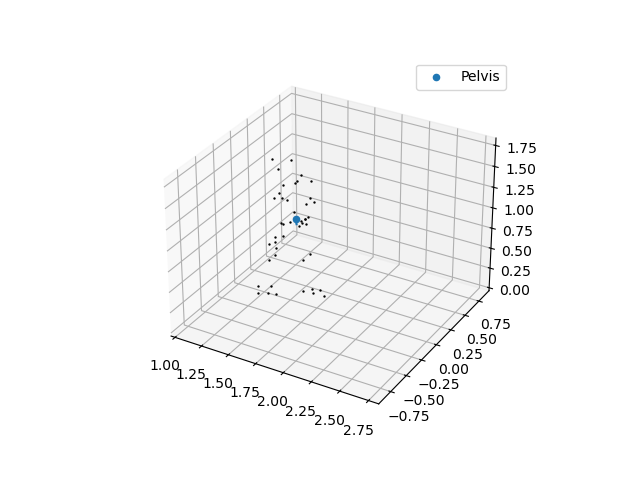

In [6]:
kinematics.calculate_Pelvis(kinematics.Labels)
visualise(kinematics, segments = ['Pelvis'])
plt.show()

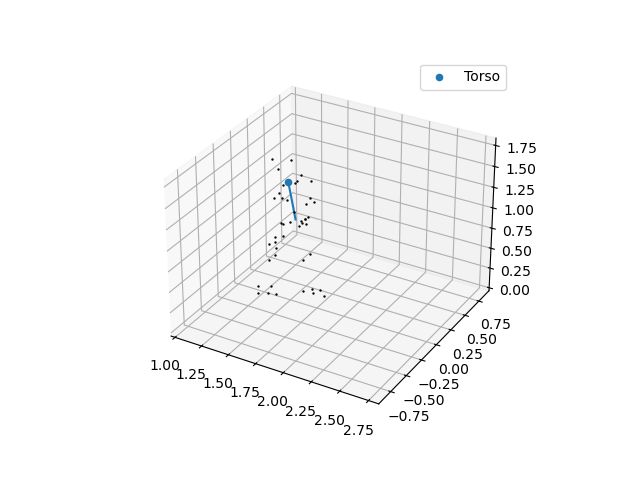

In [7]:
kinematics.calculate_Trunk(kinematics.Labels)
visualise(kinematics, segments = ['Torso'])
plt.show()

The simplified method can be used to calculate the trunk segments by providing a reduced list of labels.

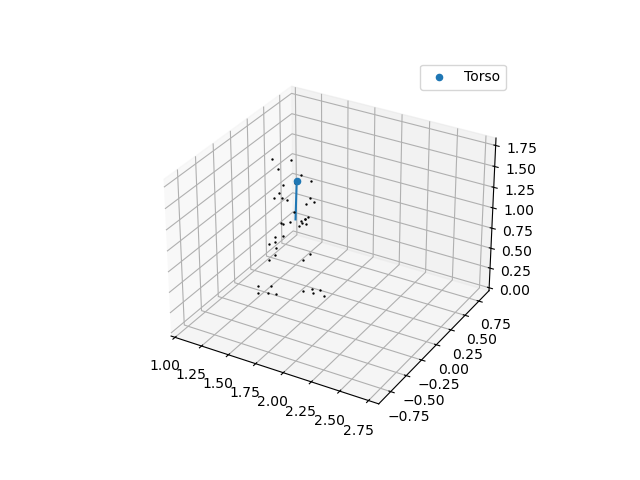

In [8]:
kinematics.calculate_Trunk(Labels = ['C7'])
visualise(kinematics, segments = ['Torso'])
plt.show()

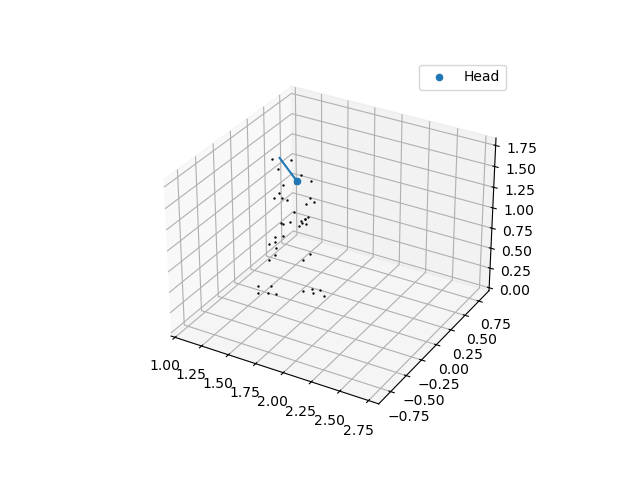

In [9]:
kinematics.calculate_Head(kinematics.Labels)
visualise(kinematics, segments = ['Head'])
plt.show()

The simplified method can be used to calculate the head segment by providing an empty label list.

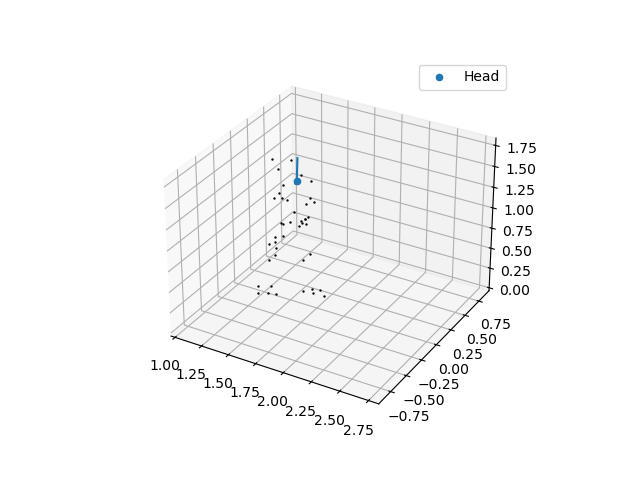

In [10]:
kinematics.calculate_Head([])
visualise(kinematics, segments = ['Head'])
plt.show()

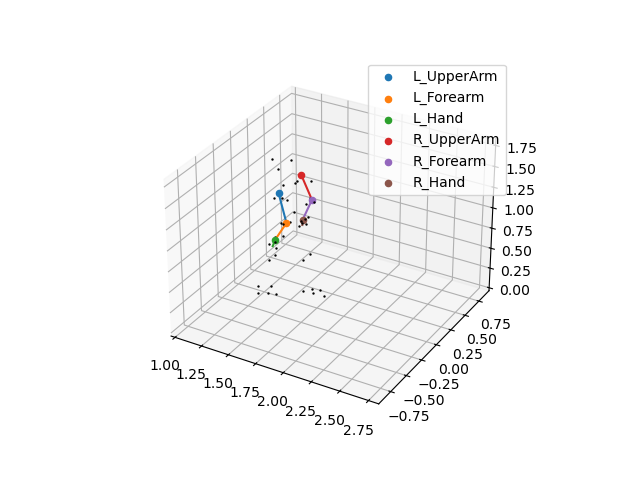

In [11]:
kinematics.calculate_UpperLimbs(kinematics.Labels)
visualise(kinematics, segments = ['L_UpperArm','L_Forearm','L_Hand','R_UpperArm','R_Forearm','R_Hand'])
plt.show()

The simplified method can be used to calculate the arm segments by providing a reduced list of marker labels.

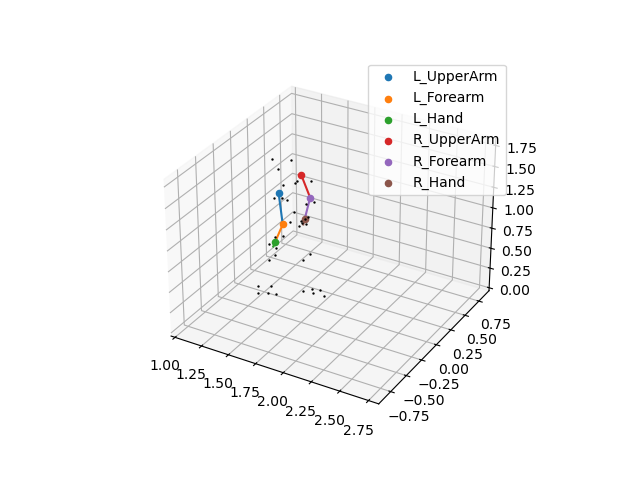

In [12]:
kinematics.calculate_UpperLimbs(Labels = ['LELL','LWRU','RELL','RWRU'])
visualise(kinematics, segments = ['L_UpperArm','L_Forearm','L_Hand','R_UpperArm','R_Forearm','R_Hand'])
plt.show()

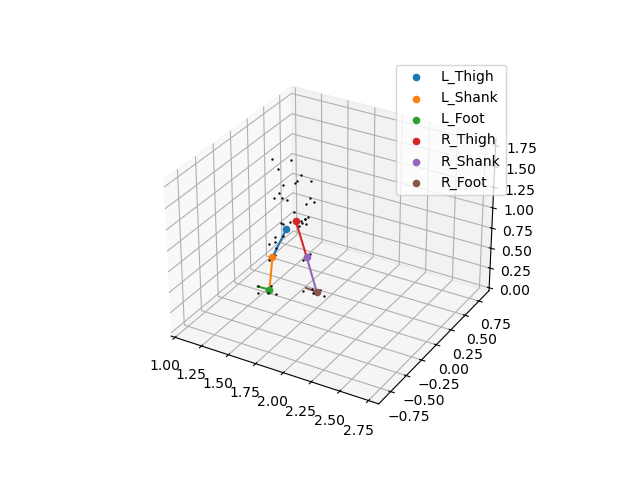

In [13]:
kinematics.calculate_LowerLimbs(kinematics.Labels)
visualise(kinematics, segments = ['L_Thigh','L_Shank','L_Foot','R_Thigh','R_Shank','R_Foot'])
plt.show()

The simplified method can be used to calculate the leg segments by providing a reduced list of marker labels.

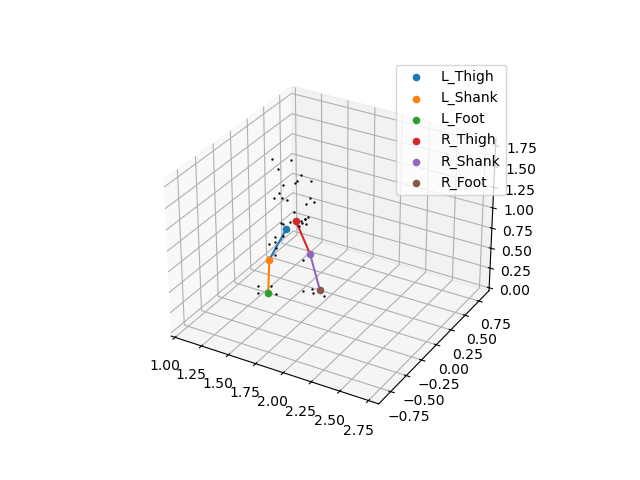

In [14]:
kinematics.calculate_LowerLimbs(Labels = ['LFLE','LLMAL','RFLE','RLMAL'])
visualise(kinematics, segments = ['L_Thigh','L_Shank','L_Foot','R_Thigh','R_Shank','R_Foot'])
plt.show()

The whole body center of mass can be calculated using the previously calculated segment data.

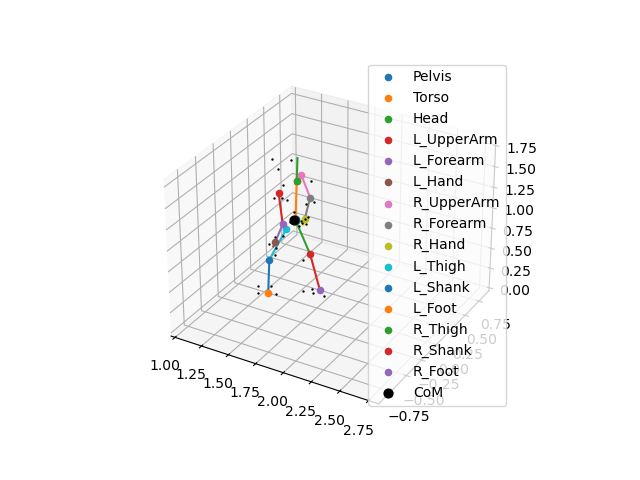

In [15]:
CoM = kinematics.calculate_CoM()
ax = visualise(kinematics, segments = list(kinematics.SegmentCoordinateSystem.keys()))
com = CoM[:,500]   
ax.scatter(com[0],com[1],com[2], color = 'k', s=40, label = 'CoM')
ax.legend()
plt.show()

The calculate_CoM function calculates any segments which have not already been calculated.

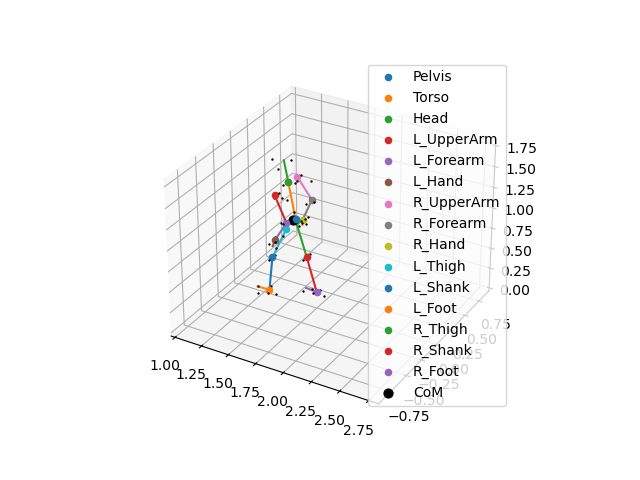

In [16]:
kinematics    = center_of_mass.Kinematics(Position, Labels, sex)
Kinematic_com = kinematics.calculate_CoM()
ax = visualise(kinematics, segments = list(kinematics.SegmentCoordinateSystem.keys()))
com = Kinematic_com[:,500]   
ax.scatter(com[0],com[1],com[2], color = 'k', s=40, label = 'CoM')
ax.legend()
plt.show()